In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # For ANOVA/Kruskal-Wallis
from IPython.display import display # For better table display in Jupyter

# Configure visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Default figure size

In [2]:
# Define the country names as you want them to appear in plots and tables
# and map them to their specific cleaned file names.
country_file_map = {
    "Benin": "benin_clean.csv",
    "Sierra Leone": "sierraleone-bumbuna_clean.csv",
    "Togo": "togo-dapaong_qc_clean.csv"
}

country_data_cleaned = {} # Dictionary to store DataFrames for each country
countries_loaded_successfully = [] # Keep track of successfully loaded countries

data_load_success = True
for country_display_name, specific_filename in country_file_map.items():
    try:
        file_path = f"data/{specific_filename}" # Construct the full path
        df_country = pd.read_csv(file_path)

        # Ensure Timestamp is datetime if it exists and is not already
        if 'Timestamp' in df_country.columns:
            if not pd.api.types.is_datetime64_any_dtype(df_country['Timestamp']):
                df_country['Timestamp'] = pd.to_datetime(df_country['Timestamp'], errors='coerce')
            # Drop rows where Timestamp couldn't be parsed if any (should be clean already)
            df_country.dropna(subset=['Timestamp'], inplace=True)

        country_data_cleaned[country_display_name] = df_country
        countries_loaded_successfully.append(country_display_name)
        print(f"Successfully loaded cleaned data for {country_display_name} from {file_path}. Shape: {df_country.shape}")
        if df_country.empty:
            print(f"Warning: Data for {country_display_name} loaded as an empty DataFrame from {file_path}.")
            data_load_success = False # Mark overall success as False if any df is empty

    except FileNotFoundError:
        print(f"Error: Cleaned data file not found at {file_path} for {country_display_name}.")
        country_data_cleaned[country_display_name] = pd.DataFrame() # Assign empty df
        data_load_success = False
    except Exception as e:
        print(f"Error loading data for {country_display_name} from {file_path}: {e}")
        country_data_cleaned[country_display_name] = pd.DataFrame()
        data_load_success = False

# Update the list of countries to only include those successfully loaded for further processing
countries = countries_loaded_successfully

# Verification
if data_load_success and countries: # Check if at least one country was loaded successfully
    print("\nAll specified country data loaded successfully.")
    # Optional: Display head for the first loaded country to verify
    first_loaded_country = countries[0]
    if first_loaded_country in country_data_cleaned and not country_data_cleaned[first_loaded_country].empty:
        print(f"\nSample data from {first_loaded_country} (cleaned):")
        display(country_data_cleaned[first_loaded_country].head())
elif not countries:
    print("\nWarning: No country datasets could be loaded. Please check file paths and file contents.")
else: # Some loaded, some failed
    print("\nWarning: One or more country datasets could not be loaded or are empty. Subsequent analyses might be affected.")
    print(f"Successfully loaded countries: {countries}")

Successfully loaded cleaned data for Benin from data/benin_clean.csv. Shape: (517707, 18)
Successfully loaded cleaned data for Sierra Leone from data/sierraleone-bumbuna_clean.csv. Shape: (509053, 18)
Successfully loaded cleaned data for Togo from data/togo-dapaong_qc_clean.csv. Shape: (516343, 18)

All specified country data loaded successfully.

Sample data from Benin (cleaned):


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


In [3]:
all_country_dfs_list = []
if data_load_success: # Proceed only if all individual dataframes were loaded
    for country_name, df in country_data_cleaned.items():
        if not df.empty:
            df_copy = df.copy()
            df_copy['Country'] = country_name # Add a 'Country' column for grouping/hue
            all_country_dfs_list.append(df_copy)

if all_country_dfs_list:
    combined_df = pd.concat(all_country_dfs_list, ignore_index=True)
    print(f"\nCombined DataFrame created. Shape: {combined_df.shape}")
    print("Sample of combined_df:")
    display(combined_df.head())
    print(f"\nCountries in combined_df: {combined_df['Country'].unique()}")
    print(f"\nData types in combined_df:\n{combined_df.dtypes}")
else:
    print("\nNo data was successfully loaded into individual DataFrames. Cannot create a combined DataFrame.")
    combined_df = pd.DataFrame() # Ensure combined_df exists as an empty DataFrame


Combined DataFrame created. Shape: (1543103, 19)
Sample of combined_df:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,Benin
1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,Benin
2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,Benin
3,2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,Benin
4,2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,Benin



Countries in combined_df: ['Benin' 'Sierra Leone' 'Togo']

Data types in combined_df:
Timestamp        datetime64[ns]
GHI                     float64
DNI                     float64
DHI                     float64
ModA                    float64
ModB                    float64
Tamb                    float64
RH                      float64
WS                      float64
WSgust                  float64
WSstdev                 float64
WD                      float64
WDstdev                 float64
BP                        int64
Cleaning                  int64
Precipitation           float64
TModA                   float64
TModB                   float64
Country                  object
dtype: object



--- Metric Comparison: Boxplots ---


<ipython-input-4-1c5ebabddffa>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x='Country', y=metric, palette='viridis')


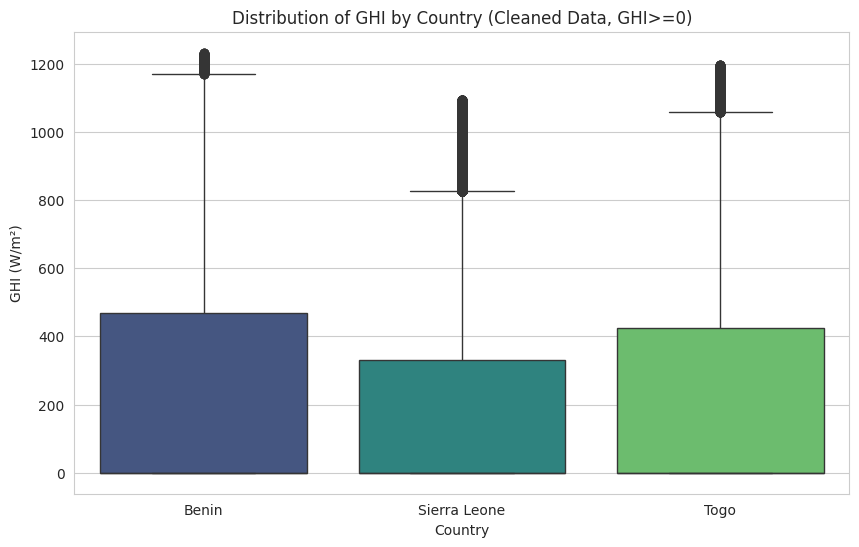

<ipython-input-4-1c5ebabddffa>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x='Country', y=metric, palette='viridis')


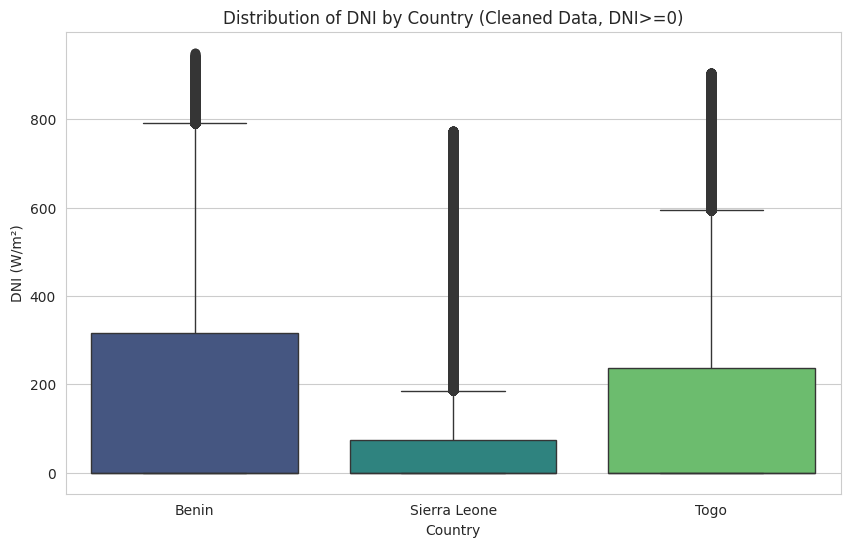

<ipython-input-4-1c5ebabddffa>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x='Country', y=metric, palette='viridis')


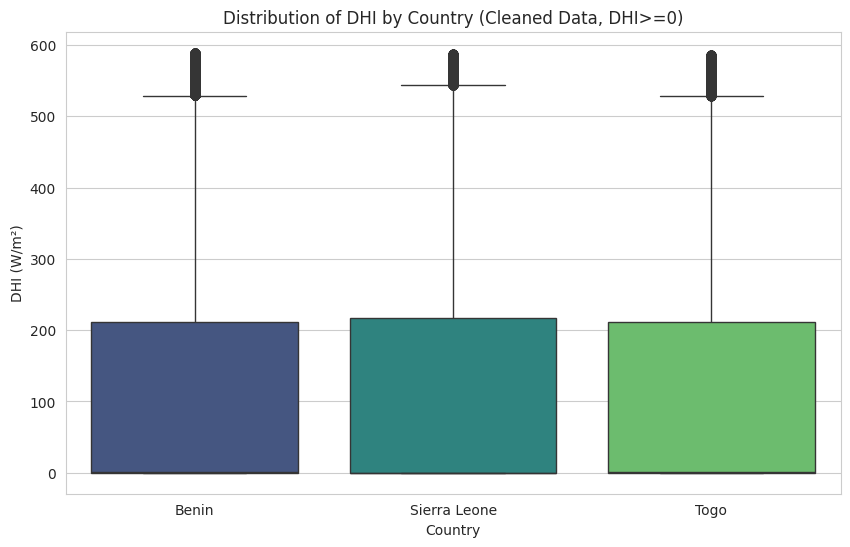

In [4]:
if not combined_df.empty:
    metrics_to_boxplot = ['GHI', 'DNI', 'DHI']

    print("\n--- Metric Comparison: Boxplots ---")
    for metric in metrics_to_boxplot:
        if metric in combined_df.columns:
            plt.figure(figsize=(10, 6))

            # For solar irradiance, it's often more insightful to plot non-negative values,
            # especially if any near-zero negatives slipped through or if focusing on resource availability.
            # Our cleaning should have handled negatives, but this is a safeguard for plotting.
            plot_data = combined_df[combined_df[metric] >= 0] if metric in ['GHI', 'DNI', 'DHI'] else combined_df

            if not plot_data.empty:
                # Using hue='Country' makes sense if you have another categorical variable on x,
                # or if you want the legend. If x='Country', hue is redundant unless you want to force a specific color order.
                sns.boxplot(data=plot_data, x='Country', y=metric, palette='viridis')
                plt.title(f'Distribution of {metric} by Country (Cleaned Data, {metric}>=0)')
                plt.ylabel(f'{metric} (W/m²)')
                plt.xlabel('Country')
                plt.show()
            else:
                print(f"No data with {metric} >= 0 to plot.")
        else:
            print(f"Metric '{metric}' not found in combined_df.")
else:
    print("Combined DataFrame is empty. Skipping boxplots.")

In [5]:
if not combined_df.empty:
    metrics_for_table = ['GHI', 'DNI', 'DHI']
    summary_stats_list = []

    print("\n--- Metric Comparison: Summary Table ---")
    for metric in metrics_for_table:
        if metric in combined_df.columns:
            # Consider only non-negative values for these solar metrics for summary stats
            # This aligns with how solar potential is typically assessed.
            metric_data_for_stats = combined_df[combined_df[metric] >= 0] if metric in ['GHI','DNI','DHI'] else combined_df

            if not metric_data_for_stats.empty:
                country_summary = metric_data_for_stats.groupby('Country')[metric].agg(['mean', 'median', 'std']).reset_index()
                country_summary['Metric'] = metric
                summary_stats_list.append(country_summary)
            else:
                print(f"No data with {metric} >= 0 for summary statistics.")
        else:
            print(f"Metric '{metric}' not found for summary table.")

    if summary_stats_list:
        summary_table_concat = pd.concat(summary_stats_list)

        # Pivot table for better readability: Countries as rows, metrics as columns, stats as sub-columns
        summary_table_pivot = summary_table_concat.pivot_table(
            index='Country',
            columns='Metric',
            values=['mean', 'median', 'std']
        )

        # Reorder columns for a more logical flow: GHI (mean, median, std), DNI (mean, median, std), etc.
        if not summary_table_pivot.empty:
            summary_table_pivot = summary_table_pivot.reindex(columns=metrics_for_table, level='Metric')
            # Flatten MultiIndex columns for better display if preferred or if styling has issues
            # summary_table_pivot.columns = ['_'.join(col).strip() for col in summary_table_pivot.columns.values]


            print("\nSummary Statistics Table (Mean, Median, Std for values >=0):")
            # Display with formatting for better readability
            try:
                # Using .style.format for nicer output in Jupyter
                display(summary_table_pivot.style.format("{:.2f}").set_caption("Summary Statistics of Solar Metrics by Country"))
            except NameError: # if not in a Jupyter environment with display
                 print(summary_table_pivot.to_string(float_format="{:.2f}".format))
            except Exception as e:
                 print(f"Could not display styled table: {e}")
                 print(summary_table_pivot.to_string(float_format="{:.2f}".format))
        else:
            print("Pivoted summary table is empty.")
    else:
        print("Could not generate data for the summary statistics table.")
else:
    print("Combined DataFrame is empty. Skipping summary table.")


--- Metric Comparison: Summary Table ---

Summary Statistics Table (Mean, Median, Std for values >=0):


In [6]:
if not combined_df.empty and 'GHI' in combined_df.columns and 'Country' in combined_df.columns:
    print("\n--- Statistical Testing for GHI Differences Between Countries ---")

    # For comparing solar potential, it makes sense to use GHI > 0 (daytime values)
    # Also, Kruskal-Wallis is robust to outliers but extreme values can still influence it.
    # Using GHI > 0 also helps avoid issues with large numbers of zeros if comparing distributions.
    ghi_daytime = combined_df[combined_df['GHI'] > 0]

    if ghi_daytime.empty or ghi_daytime['Country'].nunique() < 2:
        print("Not enough data or country groups with GHI > 0 for statistical testing.")
    else:
        # Prepare data for Kruskal-Wallis: a list of GHI Series, one for each country
        # Ensure that each list element is a 1D array or Series of the GHI values for that country
        country_ghi_samples = [
            ghi_daytime['GHI'][ghi_daytime['Country'] == country].dropna().values
            for country in countries
            if country in ghi_daytime['Country'].unique() and not ghi_daytime['GHI'][ghi_daytime['Country'] == country].dropna().empty
        ]

        # Kruskal-Wallis test requires at least 2 groups
        if len(country_ghi_samples) < 2:
            print("Not enough valid country groups (at least 2 required) with GHI > 0 data for Kruskal-Wallis test.")
        else:
            print(f"Number of groups for Kruskal-Wallis: {len(country_ghi_samples)}")
            for i, country_name in enumerate([c for c in countries if c in ghi_daytime['Country'].unique() and not ghi_daytime['GHI'][ghi_daytime['Country'] == c].dropna().empty]):
                 print(f"  Sample size for {country_name} (GHI > 0): {len(country_ghi_samples[i])}")


            print("\nPerforming Kruskal-Wallis H-test (non-parametric) for GHI > 0...")
            try:
                # The * operator unpacks the list of arrays into separate arguments for the function
                h_statistic, p_value_kruskal = stats.kruskal(*country_ghi_samples)

                print(f"Kruskal-Wallis H-test results for GHI (>0) across countries:")
                print(f"  H-statistic: {h_statistic:.2f}")
                print(f"  P-value: {p_value_kruskal:.4g}") # .4g for better precision with small p-values

                alpha = 0.05 # Significance level
                if p_value_kruskal < alpha:
                    print(f"  Interpretation: Since the p-value ({p_value_kruskal:.4g}) is less than alpha ({alpha}), we reject the null hypothesis.")
                    print("  This suggests there is a statistically significant difference in the GHI distributions (medians) among the countries.")
                else:
                    print(f"  Interpretation: Since the p-value ({p_value_kruskal:.4g}) is greater than or equal to alpha ({alpha}), we fail to reject the null hypothesis.")
                    print("  This suggests there is no statistically significant difference in the GHI distributions (medians) among the countries based on this test.")
            except ValueError as ve:
                print(f"  Error during Kruskal-Wallis test: {ve}.")
                print(f"  This can occur if groups have insufficient data or all values within a group are identical.")
            except Exception as e:
                print(f"  An unexpected error occurred during Kruskal-Wallis test: {e}")
else:
    print("Combined DataFrame is empty or GHI/Country columns missing. Skipping statistical tests.")


--- Statistical Testing for GHI Differences Between Countries ---
Number of groups for Kruskal-Wallis: 3
  Sample size for Benin (GHI > 0): 260396
  Sample size for Sierra Leone (GHI > 0): 249040
  Sample size for Togo (GHI > 0): 259838

Performing Kruskal-Wallis H-test (non-parametric) for GHI > 0...
Kruskal-Wallis H-test results for GHI (>0) across countries:
  H-statistic: 10189.89
  P-value: 0
  Interpretation: Since the p-value (0) is less than alpha (0.05), we reject the null hypothesis.
  This suggests there is a statistically significant difference in the GHI distributions (medians) among the countries.


### Key Observations from Cross-Country Comparison:

*   **Benin exhibits the highest overall solar resource potential among the three countries, demonstrating the leading mean GHI (237.48 W/m²) and mean DNI (167.14 W/m²).** While its GHI also shows the greatest variability (Std Dev: 327.17 W/m²), its strong performance in direct normal irradiance suggests more frequent clear-sky conditions favorable for diverse solar energy applications.

*   **Sierra Leone consistently presents the lowest solar irradiance metrics, with the lowest mean GHI (187.21 W/m²) and notably very low mean DNI (104.21 W/m²).** The DNI boxplot for Sierra Leone being very compressed near zero, alongside a DHI mean comparable to the other nations, indicates its solar resource is predominantly diffuse, characteristic of more frequent overcast or hazy conditions.

*   **The differences in daytime GHI distributions (medians) across Benin, Sierra Leone, and Togo are highly statistically significant (Kruskal-Wallis H-statistic: 10189.89, p-value ≈ 0).** Togo (mean GHI: 225.03 W/m²) positions itself as a strong contender, particularly in GHI, with values often comparable to or exceeding Benin's typical range as seen in the boxplots, and significantly outperforming Sierra Leone.



--- (Bonus) Visual Summary: Bar Chart Ranking by Average GHI (Daytime) ---


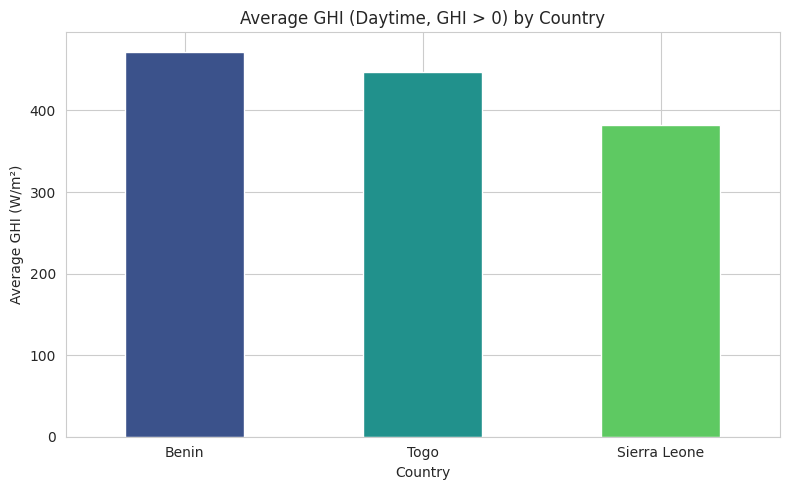

In [7]:
if not combined_df.empty and 'GHI' in combined_df.columns and 'Country' in combined_df.columns:
    print("\n--- (Bonus) Visual Summary: Bar Chart Ranking by Average GHI (Daytime) ---")

    # Calculate average GHI (considering GHI > 0 for daytime potential)
    # Ensure there's data after filtering
    ghi_daytime_for_ranking = combined_df[combined_df['GHI'] > 0]

    if not ghi_daytime_for_ranking.empty:
        avg_ghi_ranking = ghi_daytime_for_ranking.groupby('Country')['GHI'].mean().sort_values(ascending=False)

        if not avg_ghi_ranking.empty:
            plt.figure(figsize=(8, 5))
            # Create a palette with enough distinct colors for the number of countries
            palette = sns.color_palette('viridis', n_colors=len(avg_ghi_ranking))
            avg_ghi_ranking.plot(kind='bar', color=palette)

            plt.title('Average GHI (Daytime, GHI > 0) by Country')
            plt.ylabel('Average GHI (W/m²)')
            plt.xlabel('Country')
            plt.xticks(rotation=0) # Keep country names horizontal
            plt.tight_layout() # Adjust plot to prevent labels from being cut off
            plt.show()
        else:
            print("No data available for GHI ranking chart (after grouping and calculating mean).")
    else:
        print("No daytime GHI data (GHI > 0) available for ranking chart.")
else:
    print("Combined DataFrame is empty or GHI/Country columns missing. Skipping GHI ranking chart.")